In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the CSV files into pandas DataFrames
df_stores = pd.read_csv('Data/stores.csv')
df_items = pd.read_csv('Data/items.csv')
df_transactions = pd.read_csv('Data/transactions.csv')
df_oil = pd.read_csv('Data/oil.csv')
df_holidays_events = pd.read_csv('Data/holidays_events.csv')

# Note: train file is very large.
# To make sure we fit RAM avaible on Google-Colab, we will load only part of the file
#nrows=2e6: This argument tells Pandas to read only the first 2 million rows of the CSV file.
df_train = pd.read_csv('Data/train.csv', nrows=2e6)

In [ ]:
#store_nbr:	Unique store number/ID
#city: The city where the store is located.
#state:	The state within the country
#type:	Store type/category — probably a label indicating store format or size.
#cluster:	Store cluster number — groups stores by similarity

df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
#Store Clusters (cluster): Number of unique store clusters.
print("Total cluster(store types): ",df_stores['cluster'].nunique())

#Geographic Spread: Number of unique states and cities.
print("Total number of states: ",df_stores['state'].nunique())
print("Total number of cities: ",df_stores['city'].nunique())

#Store Type Distribution: Frequency of store types
df_stores['type'].value_counts()

Total store number:  54
state
Pichincha                         19
Guayas                            11
Azuay                              3
Manabi                             3
Santo Domingo de los Tsachilas     3
Cotopaxi                           2
El Oro                             2
Los Rios                           2
Tungurahua                         2
Bolivar                            1
Chimborazo                         1
Esmeraldas                         1
Imbabura                           1
Loja                               1
Pastaza                            1
Santa Elena                        1
Name: store_nbr, dtype: int64


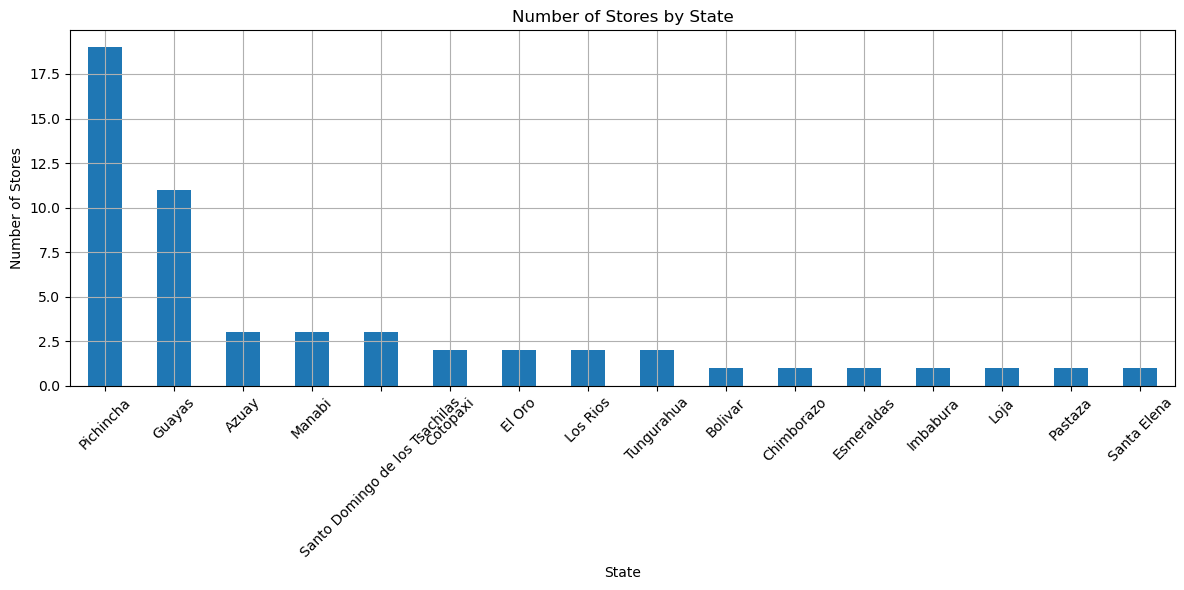

In [16]:
#Plot the number of stores per state

# Count number of stores in each state
store_counts = df_stores.groupby('state')['store_nbr'].nunique().sort_values(ascending=False)
print('Total store number: ',store_counts.sum())
print(store_counts)




store_counts.plot(kind='bar', figsize=(12, 6), title='Number of Stores by State')
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
#product-level metadata dataset—likely part of a larger retail or sales forecasting dataset.
#item_nbr	A unique identifier for each product (item number).
#family	The category or department the product belongs to (e.g., GROCERY I).
#class	A subcategory or grouping code (numeric class label).
#perishable	Indicates whether the item is perishable (1 = yes, 0 = no).

df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


Unique items 4100


<Axes: xlabel='family'>

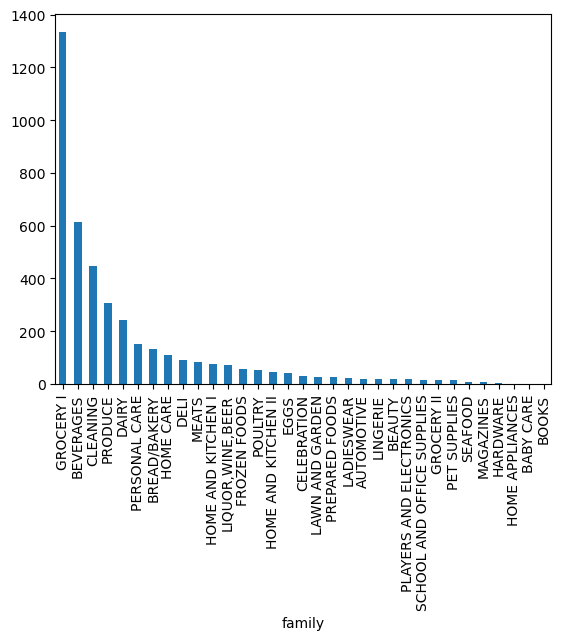

In [ ]:
#Check number of unique products and families:
print("Unique items", df_items['item_nbr'].nunique())

# Plot the number of items for each family
df_items['family'].value_counts().plot(kind='bar')

In [7]:
#store_nbr, transactions id
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [17]:
#Convert date to datetime format:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

#Unique store number and time range
print('Total store number ', df_transactions['store_nbr'].nunique())
df_transactions['date'].min(), df_transactions['date'].max()


Total store number  54


(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [18]:
#date	The date of the observation (daily frequency).
#dcoilwtico	Daily closing price of West Texas Intermediate (WTI) crude oil in USD.
#Prices are measured in USD per barrel.

df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [19]:
#date:	The date when the event (holiday) occurs.
#type:	The category of the event — here, it’s all "Holiday".
#locale:	The geographic scope of the holiday (e.g., "Local", "Regional", "National").
#locale_name:	The specific region name where the holiday is observed (e.g., city).
#description:	A brief description or name of the holiday or event.
#transferred:(True or False) indicating if the holiday was moved to a different date.

df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [21]:
#id:	A unique identifier for each row/record.
#date:	The date of the transaction (daily frequency).
#store_nbr:	Identifier for the store.
#item_nbr:	Identifier for the item.
#unit_sales:	The number of units sold on that day.
#onpromotion:	Whether the item was on promotion (True/False or NaN).

df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


This is a multivariate time series dataset because: it varies by both time and store/item

It is at a very granular level: 
One row = one item sold at one store on one date.

## Filter for the store number from Guayas region

In [22]:
# Select list of stores located in the 'Guayas' region
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()
store_ids

array([24, 26, 27, 28, 29, 30, 32, 34, 35, 36, 51])

In [37]:
# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 1000000

# Read the csv file in chunks
for chunk in pd.read_csv('Data/train.csv', chunksize=chunk_size):

  # Filter the chunk for the desired store IDs
  chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)]
  # Append the filtered chunk to the list
  filtered_chunks.append(chunk_filtered)
  
  # Optional: Delete the chunk to free up memory
  del chunk

# Concatenate all the filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

/var/folders/mh/fgvwq54x3dlg6k690k5t0qvh0000gn/T/ipykernel_3881/2727290866.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Data/train.csv', chunksize=chunk_size):


In [25]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18789,2013-01-02,24,103665,6.0,NaN
1,18790,2013-01-02,24,105574,12.0,NaN
2,18791,2013-01-02,24,105575,2.0,NaN
3,18792,2013-01-02,24,105577,1.0,NaN
4,18793,2013-01-02,24,105693,7.0,NaN


In [26]:
df_train.shape

(22941656, 6)

## Filter for the condition: select top 3 families

In [40]:
# Plotting the number of items per family (for top 3 families only)

# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['family', 'Item Count']
top_3_families = items_per_family.head(3)

items_per_family.head(10)

,family,Item Count
0,GROCERY I,1334
1,BEVERAGES,613
2,CLEANING,446
3,PRODUCE,306
4,DAIRY,242
5,PERSONAL CARE,153
6,BREAD/BAKERY,134
7,HOME CARE,108
8,DELI,91
9,MEATS,84


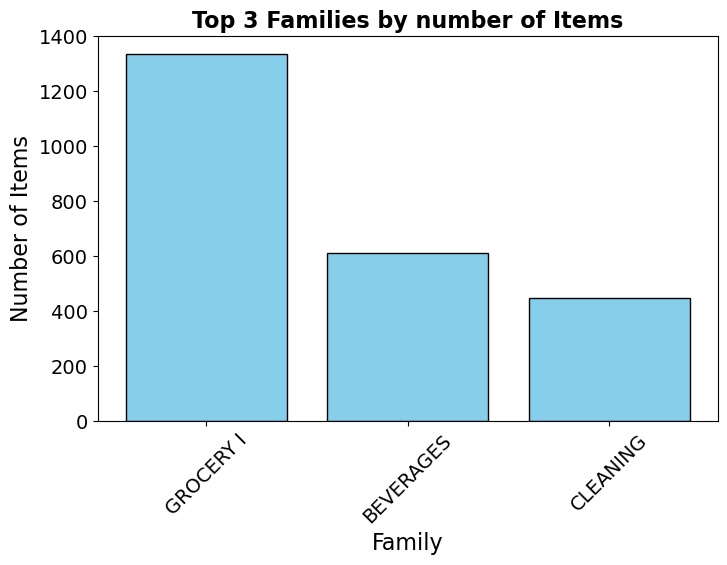

In [41]:
# Plot the top 3 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['family'], top_3_families['Item Count'], color ='skyblue', edgecolor ='black')
plt.xlabel('Family', fontsize = 16)
plt.ylabel('Number of Items', fontsize = 16)
plt.title('Top 3 Families by number of Items', fontsize = 16, fontweight ='bold')
plt.xticks(fontsize = 14, rotation=45)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Filter train with top 3 families
item_ids = df_items[df_items['family'].isin(top_3_families['family'].unique())]['item_nbr'].unique()
df_train_filtered = df_train[df_train['item_nbr'].isin(item_ids)]
df_train_filtered.shape

(14745768, 6)

# Save train data filtered for Guaya state and top 3 item families

In [ ]:
# Save and download filter train
#df_train_filtered.to_csv('train_Guayas.csv', index= False)
#from google.colab import files
#files.download('train_Guayas.csv')

In [51]:
#Save featured data
df_train_filtered.to_csv('Data/train_Guayas.csv', index=False)
#Read data automatically from drive
df_train = pd.read_csv('Data/train_Guayas.csv')

/var/folders/mh/fgvwq54x3dlg6k690k5t0qvh0000gn/T/ipykernel_3881/21018796.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('Data/train_Guayas.csv')


In [45]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18789,2013-01-02,24,103665,6.0,NaN
1,18790,2013-01-02,24,105574,12.0,NaN
2,18791,2013-01-02,24,105575,2.0,NaN
3,18792,2013-01-02,24,105577,1.0,NaN
4,18793,2013-01-02,24,105693,7.0,NaN


In [52]:
df_train.shape

(14745768, 6)

In [55]:
print('Total store number ', df_train['store_nbr'].nunique())
print('Total item number ', df_train['item_nbr'].nunique())

Total store number  11
Total item number  2323
